In [177]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftfreq
import sounddevice as sd


In [178]:
# Lê o arquivo de áudio
signal, fs = sf.read('Audio.wav')


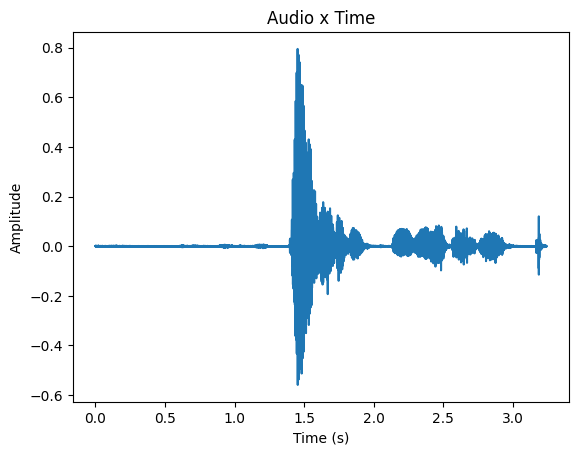

In [179]:
t = np.linspace(0, len(signal)/fs, len(signal))
plt.plot(t, signal)
plt.title("Audio x Time")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [180]:
# transformada de fourier - converte o sinal do domínio do tempo pro domínio da frequência
n = fft(signal)
frequency_dom = fftfreq(len(n), 1/fs)

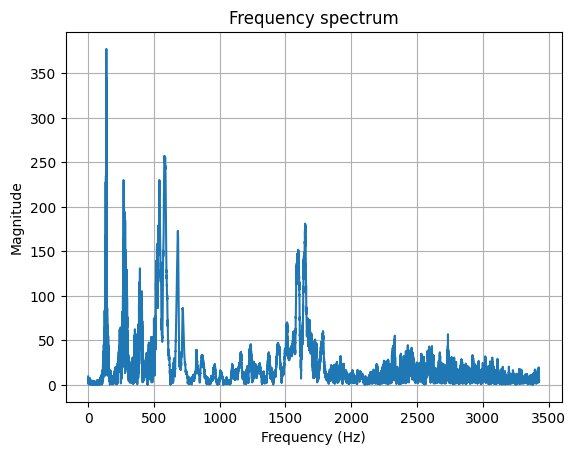

In [181]:
# Mostra espectro
plt.plot(frequency_dom[:len(n)//14], np.abs(n[:len(n)//14]))
plt.title("Frequency spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [188]:
# Função para aplicar filtros no domínio da frequência
""" Parâmetros:
        signal_fft (np.array): Coeficientes da FFT do sinal
        frequencies (np.array): Array de frequências correspondente
        filter_type (str): Tipo de filtro ('low', 'high', 'band')
        cutoff_low (float): Frequência de corte inferior
        cutoff_high (float): Frequência de corte superior (apenas para filtro banda) """

def fft_filter(signal_fft, frequencies, filter_type, cutoff_low, cutoff_high=None):
    filtered = signal_fft.copy()
    if filter_type == 'low':
        filtered[np.abs(frequencies) > cutoff_low] = 0
    elif filter_type == 'high':
        filtered[np.abs(frequencies) < cutoff_low] = 0
    elif filter_type == 'band':
        if cutoff_high is None:
            raise ValueError("Para filtro 'band', por favor adicione um cutoff_high!")
        filtered[(np.abs(frequencies) < cutoff_low) | (np.abs(frequencies) > cutoff_high)] = 0
    else:
        raise ValueError("Tipo de filtro inválido.")

    return filtered

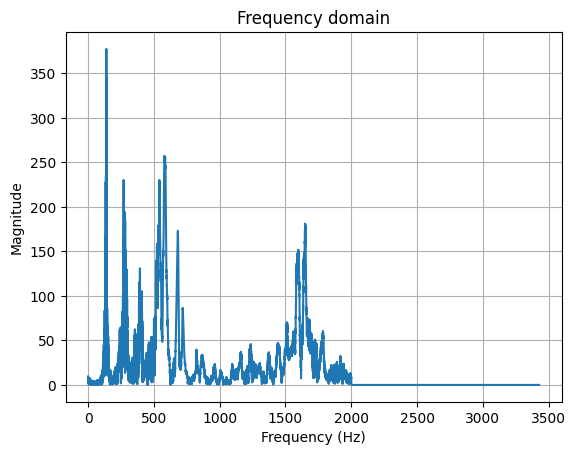

In [189]:
n_filtered = fft_filter(n, frequency_dom, 'low', 2000)
plt.plot(frequency_dom[:len(frequency_dom)//14], np.abs(n_filtered[:len(n)//14]))
plt.title("Frequency domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

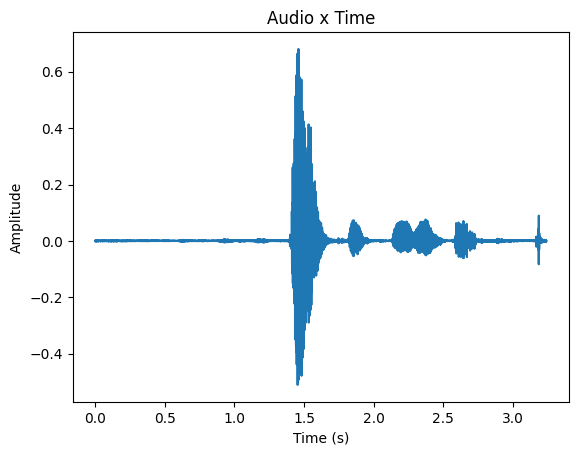

In [184]:
time_dom = np.real(ifft(n_filtered))
t = np.linspace(0, len(time_dom)/fs, len(time_dom))
plt.plot(t, time_dom)
plt.title("Audio x Time")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [185]:
# Reproduz áudio filtrado
sd.play(time_dom, fs)